In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
%matplotlib inline

In [2]:
base_dir = "/Users/Jackie/Dropbox/Work/machine_learning/hw/machine-learning-ex5/ex5"

In [3]:
data = loadmat(os.path.join(base_dir, 'ex5data1.mat'))

In [4]:
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

In [5]:
m, n = X.shape
print(X.shape, y.shape)


(12, 1) (12, 1)


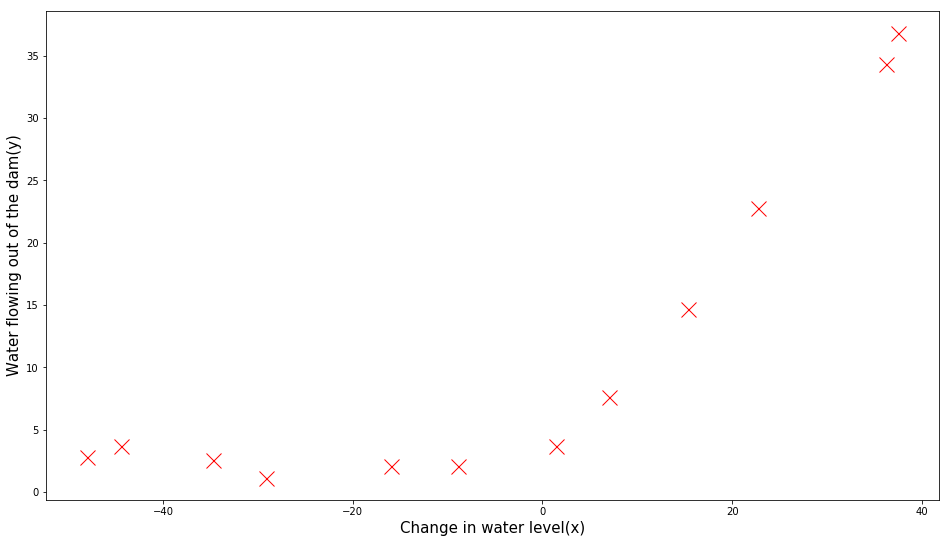

In [6]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(X,y, 'rx', markersize=15)
ax.set_xlabel('Change in water level(x)', size=15)
ax.set_ylabel('Water flowing out of the dam(y)', size=15)

In [7]:
def linearRegCostFunction(theta, X, y, penalty):
    """return J, grad"""
    m, n = X.shape
    error = X.dot(theta).reshape(-1, 1) - y
    J = np.sum(error ** 2 ) / (2*m) + penalty /2 * np.sum(theta**2)
        
    grad =  np.sum(error * X, axis=0) / m + penalty * np.concatenate([[0], theta[1:]]) 
    return J, grad 
    


In [8]:
X_c = np.hstack([np.ones(m).reshape(-1, 1), X]) 

In [9]:
theta0 = np.array([1, 1])
J, grad = linearRegCostFunction(theta0, X_c, y, 1)
print(J , grad)

304.9515255535976 [-15.30301567 599.16741084]


In [10]:

#%% =========== Part 4: Train Linear Regression =============
#%  Once you have implemented the cost and gradient correctly, the
#%  trainLinearReg function will use your cost function to train 
#%  regularized linear regression.


def trainLinearReg(X, y, penalty):
    m, n = X.shape
    theta0 = np.zeros(n)
    #, options={"maxiter": 200}
    res = opt.minimize(linearRegCostFunction, theta0,  args=(X, y, penalty), method='CG', jac=True)
    
#     print(res)
    return res.x
    
    
    

[13.08790351  0.36777923]


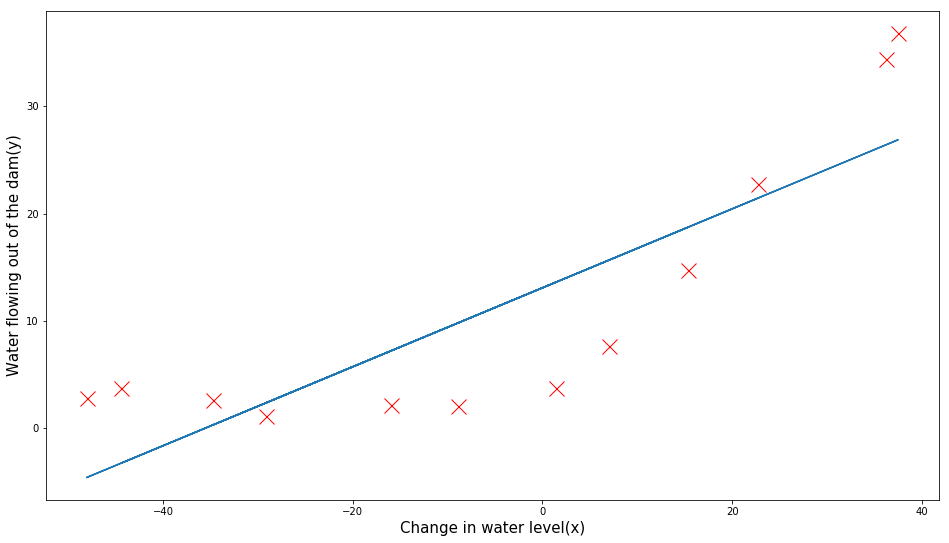

In [11]:
theta  = trainLinearReg(X_c, y, penalty=0)
print(theta)

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(X,y, 'rx', markersize=15)
ax.plot(X,X_c.dot(theta), markersize=15)
ax.set_xlabel('Change in water level(x)', size=15)
ax.set_ylabel('Water flowing out of the dam(y)', size=15)

In [27]:
def learningCurve(X, y, Xval, yval, penalty):
    m, n = X.shape
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
        
    for i in range(m):
        theta_i = trainLinearReg(X[:i, :], y[:i], penalty)
        error_train[i], _ =  linearRegCostFunction(theta_i, X[:i, :], y[:i], 0)
        error_val[i], _ =  linearRegCostFunction(theta_i, Xval, yval, 0)        
                     
    return error_train, error_val

In [28]:
Xval_c = np.hstack([np.ones(Xval.shape[0]).reshape(-1, 1), Xval]) 

In [29]:
error_train, error_val = learningCurve(X_c, y, Xval_c, yval, 0) 
print(error_train)
print(error_val)

[           nan 3.94430453e-31 2.85962078e-30 3.28659505e+00
 2.84267769e+00 1.31540488e+01 1.94439625e+01 2.00985217e+01
 1.81728587e+01 2.26094054e+01 2.32614616e+01 2.43172496e+01]
[164.11579386 205.12109575 110.30036611  45.01023181  48.36891137
  35.86514112  33.82995682  31.97098678  30.86244632  31.13599796
  28.93620747  29.55143162]


/Users/Jackie/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/Jackie/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


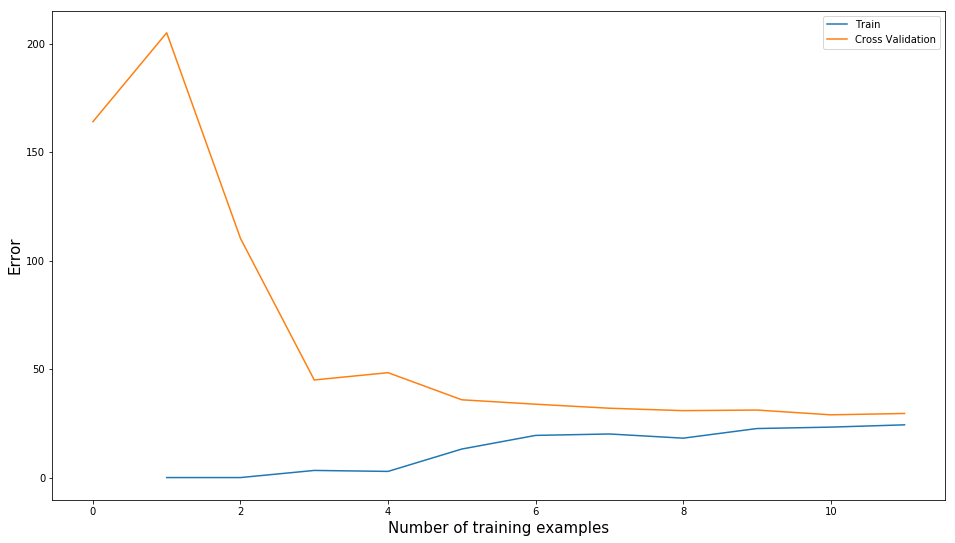

In [30]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(np.arange(m),error_train,  markersize=15)
ax.plot(np.arange(m),error_val,  markersize=15)
ax.set_xlabel('Number of training examples', size=15)
ax.set_ylabel('Error', size=15)
ax.legend(["Train", 'Cross Validation' ])

In [16]:
#%% =========== Part 6: Feature Mapping for Polynomial Regression =============
#%  One solution to this is to use polynomial regression. You should now
#%  complete polyFeatures to map each example into its powers
#%


In [17]:
def polyFeatures(X, p):
    m, _ = X.shape
    X_poly = np.zeros([m, p])
    for i in range(p):
        X_poly[:, i] = X.ravel() ** (i+1)
    
    return X_poly


def featureNormalize(X_poly):
    mu = np.mean(X_poly, axis=0) 
    sigma = np.std(X_poly, axis=0) 
    X_norm =  (X_poly - mu)/ sigma
    return X_norm, mu, sigma

In [18]:
p = 8 
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.hstack([np.ones(X_poly.shape[0]).reshape(-1, 1), X_poly]) 

X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu )/sigma
X_poly_test = np.hstack([np.ones(X_poly_test.shape[0]).reshape(-1, 1), X_poly_test]) 

X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mu )/sigma
X_poly_val = np.hstack([np.ones(X_poly_val.shape[0]).reshape(-1, 1), X_poly_val]) 

print(X_poly[1, :])

[ 1.         -0.8389201   0.0013142  -0.25896174 -0.34156482  0.09754927
 -0.45519664  0.26677343 -0.46887381]


[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.65867701 -0.24914043 -0.51947374  0.12536515 -0.48583443  0.21094261
 -0.40650357  0.23701505 -0.3498176 ]
[ 0.56720367 -0.08623328 -0.66735702  0.23309187 -0.52866609  0.24367542
 -0.39515847  0.23001932 -0.31856576]
[ 6.17861553  5.73687729  5.94146225  5.46195188  2.4600278   4.91652002
  0.1381448   4.20016321 -1.10288657]
[ 6.33789463  7.16908932  6.69473048  4.96183266  1.82574121  3.78750709
 -1.0663966   3.00463561 -2.33100049]
[10.40659281  7.95589153  5.37015906  5.02040914  2.5013935   1.99867109
  0.95470623  0.09684561  0.42181935]


/Users/Jackie/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/Jackie/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


[ 9.25668202  4.69147552  8.8369451  10.8778028  -2.08489957  2.80698513
  0.19839354 -3.95774411  2.52125247]
[ 10.27453484  12.21833013  15.41699057  -3.61676117 -22.02495201
   6.54404862   2.65051695   4.88597665  17.20282928]
[ 11.39618412   9.50898534  21.82503871  21.16758438 -57.05589886
 -51.4068544   75.48286615  40.15391296 -26.41345826]
[ 11.38708301   9.25772111  21.86269781  23.5395795  -55.43288879
 -57.06410602  70.24004322  44.32950993 -22.19292884]
[  11.20402471    6.96076947   18.36532498   47.13268917  -18.09974954
 -115.72958731  -22.20680357   89.66548748   44.11055138]
[ 11.20066431   9.26785236  18.17816163  27.27205834 -28.32328559
 -70.71313235   9.87143616  58.20957431  18.39776915]


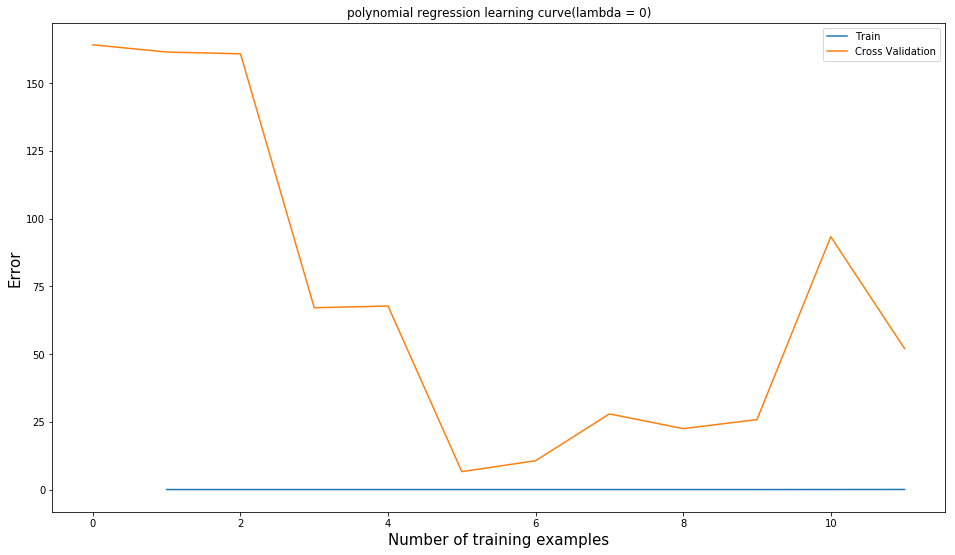

In [19]:
penalty = 0
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, penalty) 
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(np.arange(m),error_train,  markersize=15)
ax.plot(np.arange(m),error_val,  markersize=15)
ax.set_xlabel('Number of training examples', size=15)
ax.set_ylabel('Error', size=15)
ax.set_title("polynomial regression learning curve(lambda = %s)" % penalty)
ax.legend(["Train", 'Cross Validation' ])

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.56108521 -0.21222695 -0.44250677  0.10679063 -0.41385157  0.17968864
 -0.34627464  0.20189811 -0.29798745]
[ 0.62081365 -0.33626641 -0.31564817  0.01921846 -0.37069603  0.14977446
 -0.34747133  0.20289699 -0.31600752]
[ 3.64134893  4.60564352  1.86636041  4.34571379  0.66013117  3.47135982
 -0.22113805  2.72926173 -0.75376247]
[ 3.82925268  5.25852489  2.38965738  4.9995182   1.13313456  4.03300354
  0.13088173  3.17526766 -0.5186724 ]
[5.38785914 4.35645452 3.40857906 3.82790243 2.39924193 2.6811837
 1.54854843 1.70428448 0.99596437]
[6.1068054  4.52484168 3.23942259 4.08469615 2.21232016 2.9400169
 1.34720517 1.95439248 0.78514274]
[7.03017515 4.76704628 2.61446673 3.91079686 1.75311796 2.76879623
 1.06542375 1.83382394 0.62042364]
[6.88906677 4.24141325 2.50971123 3.53632621 1.61539223 2.56970911
 0.9116307  1.76662838 0.46141952]
[4.50554727 3.33906634 2.1528375  2.72873125 1.49146602 1.91079149
 0.94299058 1.23750908 0.58824463]
[4.56260457 3.14248

/Users/Jackie/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/Jackie/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


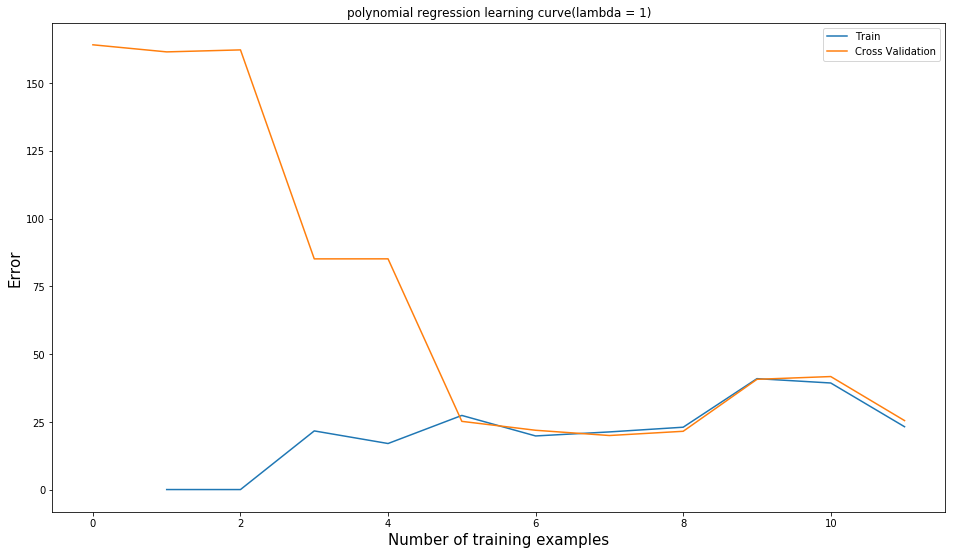

In [20]:
penalty = 1
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, penalty) 
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(np.arange(m),error_train,  markersize=15)
ax.plot(np.arange(m),error_val,  markersize=15)
ax.set_xlabel('Number of training examples', size=15)
ax.set_ylabel('Error', size=15)
ax.set_title("polynomial regression learning curve(lambda = %s)" % penalty)
ax.legend(["Train", 'Cross Validation' ])

In [21]:
#%% =========== Part 8: Validation for Selecting Lambda =============
#%  You will now implement validationCurve to test various values of 
#%  lambda on a validation set. You will then use this to select the
#%  "best" lambda value.

In [22]:
def validationCurve(X, y, Xval, yval):
    penalty_curve = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    error_train = np.zeros(len(penalty_curve)) 
    error_val = np.zeros(len(penalty_curve)) 
    
    for i in range(len(penalty_curve)):
        penalty = penalty_curve[i]
        theta_i = trainLinearReg(X, y, penalty)
        error_train[i], _ =  linearRegCostFunction(theta_i, X, y, 0)
        error_val[i], _ =  linearRegCostFunction(theta_i, Xval, yval, 0)
        
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(penalty_curve, error_train,  markersize=15)
    ax.plot(penalty_curve, error_val,  markersize=15)
    ax.set_xlabel('lambda', size=15)
    ax.set_ylabel('Error', size=15)
    ax.legend(["Train", 'Cross Validation' ])        
    return error_train, error_val

(array([2.88909830e-02, 2.29614778e-01, 2.89754344e-01, 5.11388932e-01,
        8.87217994e-01, 2.21452254e+00, 3.77820837e+00, 1.66996681e+01,
        7.63997738e+01, 1.14573185e+02]),
 array([ 53.86510956,  16.97877571,  12.41712088,   6.92071654,
          4.69850111,   4.25078922,   6.79949527,  13.45227514,
         88.45127836, 132.81882771]))

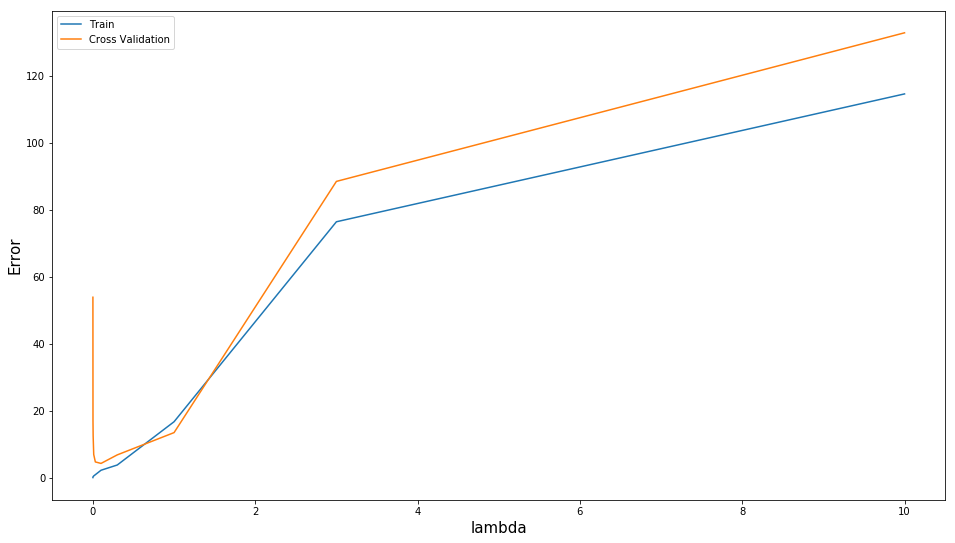

In [23]:
validationCurve(X_poly, y, X_poly_val, yval) 